Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.1/356.1 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 18.1 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mesa 2.3.0 requires solara, which is not installed.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install isic-cli

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [17]:
import pandas as pd


input_file = "C:\\Users\\sohini\\Downloads\\isic_project (1)" 
#output_file = '/home/ar24746/ISIC_FST_filtered.csv'


df = pd.read_csv(input_file, low_memory=False)


filtered_df = df[
    df["fitzpatrick_skin_type"].notna() &
    df["diagnosis_1"].isin(["Benign", "Malignant"])
]

# Select required columns
final_df = filtered_df[["isic_id", "fitzpatrick_skin_type", "diagnosis_1", "sex"]]

# Save to CSV
#final_df.to_csv(output_file, index=False)

#print(f"Filtered CSV saved as: {output_file}")

In [19]:
print(final_df.head())

            isic_id fitzpatrick_skin_type diagnosis_1     sex
83484  ISIC_6816081                    II      Benign    male
83485  ISIC_4068636                    II      Benign    male
83486  ISIC_1054769                   III      Benign    male
83487  ISIC_6349205                    II      Benign    male
83488  ISIC_9340537                    II      Benign  female


In [21]:
print(final_df["fitzpatrick_skin_type"].unique())


['II' 'III' 'I' 'IV' 'V' 'VI']


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

fst_mapping = {
    "I": "FST I",
    "II": "FST II",
    "III": "FST III",
    "IV": "FST IV",
    "V": "FST V",
    "VI": "FST VI"
}

final_df["FST_label"] = final_df["fitzpatrick_skin_type"].map(fst_mapping)
fst_order = ["FST I", "FST II", "FST III", "FST IV", "FST V", "FST VI"]
display(final_df)

# Define the desired FST order
#fst_order = ["fitzpatrick_skin_type I", "fitzpatrick_skin_type II", "fitzpatrick_skin_type III", "fitzpatrick_skin_type IV", "fitzpatrick_skin_type V", "fitzpatrick_skin_type VI"]


C:\Users\sohini\AppData\Local\Temp\ipykernel_7048\4259666647.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["FST_label"] = final_df["fitzpatrick_skin_type"].map(fst_mapping)


isic_id fitzpatrick_skin_type diagnosis_1     sex FST_label
83484   ISIC_6816081                    II      Benign    male    FST II
83485   ISIC_4068636                    II      Benign    male    FST II
83486   ISIC_1054769                   III      Benign    male   FST III
83487   ISIC_6349205                    II      Benign    male    FST II
83488   ISIC_9340537                    II      Benign  female    FST II
...              ...                   ...         ...     ...       ...
508829  ISIC_4165701                    IV      Benign    male    FST IV
508830  ISIC_6171178                    VI      Benign  female    FST VI
508831  ISIC_5222614                    II      Benign  female    FST II
508832  ISIC_5274471                    II      Benign  female    FST II
508833  ISIC_5288819                    II      Benign  female    FST II

[10121 rows x 5 columns]

In [25]:
fst_skintone = {
    "FST I": "Light",
    "FST II": "Light",
    "FST III": "Dark",
    "FST IV": "Dark",
    "FST V": "Dark",
    "FST VI": "Dark"
}
#fst_skintone ["Light", "Dark"]
final_df["FST_Skintone"] = final_df["FST_label"].map(fst_skintone)

display(final_df)

C:\Users\sohini\AppData\Local\Temp\ipykernel_7048\614971881.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["FST_Skintone"] = final_df["FST_label"].map(fst_skintone)


isic_id fitzpatrick_skin_type diagnosis_1     sex FST_label  \
83484   ISIC_6816081                    II      Benign    male    FST II   
83485   ISIC_4068636                    II      Benign    male    FST II   
83486   ISIC_1054769                   III      Benign    male   FST III   
83487   ISIC_6349205                    II      Benign    male    FST II   
83488   ISIC_9340537                    II      Benign  female    FST II   
...              ...                   ...         ...     ...       ...   
508829  ISIC_4165701                    IV      Benign    male    FST IV   
508830  ISIC_6171178                    VI      Benign  female    FST VI   
508831  ISIC_5222614                    II      Benign  female    FST II   
508832  ISIC_5274471                    II      Benign  female    FST II   
508833  ISIC_5288819                    II      Benign  female    FST II   

       FST_Skintone  
83484         Light  
83485         Light  
83486          Dark  
83487         Light  
83488         Light  
...             ...  
508829         Dark  
508830         Dark  
508831        Light  
508832        Light  
508833        Light  

[10121 rows x 6 columns]

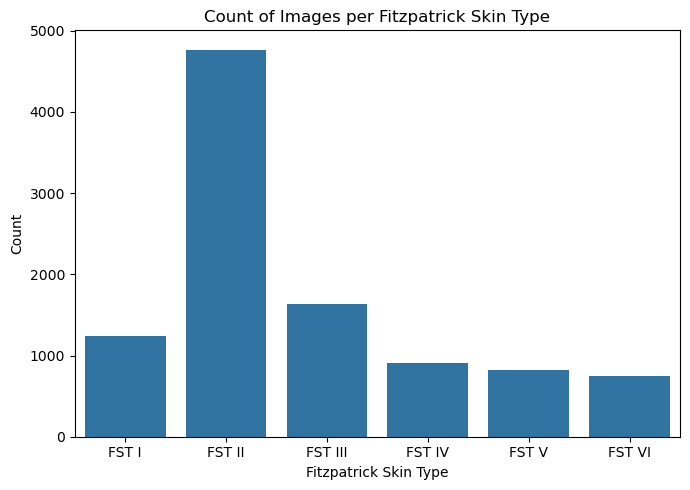

In [27]:
plt.figure(figsize=(7, 5))
sns.countplot(data=final_df, x="FST_label", order=fst_order)
plt.title("Count of Images per Fitzpatrick Skin Type")
plt.xlabel("Fitzpatrick Skin Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [29]:
# Calculate percentage of each FST type
fst_percentages = final_df["FST_label"].value_counts(normalize=True).reindex([
    "FST I", "FST II", "FST III", "FST IV", "FST V", "FST VI"
]) * 100


print("Percentage distribution of Fitzpatrick Skin Types:")
fst_table=(fst_percentages.round(2).dropna())
print(fst_table)

Percentage distribution of Fitzpatrick Skin Types:
FST_label
FST I      12.30
FST II     47.10
FST III    16.10
FST IV      8.98
FST V       8.10
FST VI      7.42
Name: proportion, dtype: float64


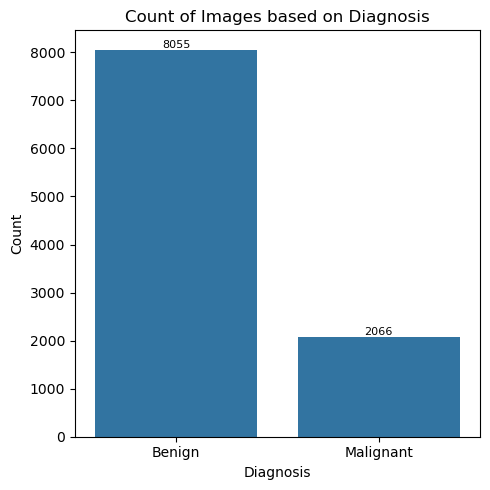

In [31]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(data=final_df, x="diagnosis_1")
plt.title("Count of Images based on Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()

for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(str(count), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=8)

plt.show()

C:\Users\sohini\AppData\Local\Temp\ipykernel_7048\1906503175.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["category"] = final_df["FST_Skintone"] + " and " + final_df["diagnosis_1"]


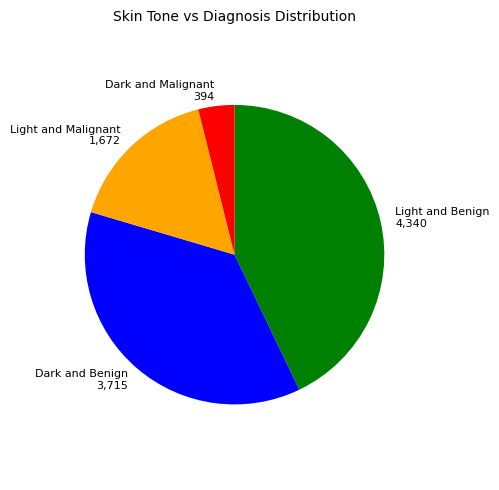

In [33]:
import matplotlib.pyplot as plt

# new column combining skin tone and diagnosis
final_df["category"] = final_df["FST_Skintone"] + " and " + final_df["diagnosis_1"]

# number of samples per category
category_counts = final_df["category"].value_counts()

# pie chart
plt.figure(figsize=(5, 5))

colors = ['green', 'blue', 'orange', 'red']  # Light-Benign, Light-Malignant, Dark-Benign, Dark-Malignant

# Add category name + count as label
labels = [f"{label}\n{count:,}" for label, count in zip(category_counts.index, category_counts.values)]

plt.pie(category_counts.values,
        labels=labels,
        colors=colors,
        startangle=90,
        counterclock=False,
        textprops={'fontsize': 8})

plt.title("Skin Tone vs Diagnosis Distribution", fontsize=10)
plt.axis('equal')
plt.tight_layout()
plt.show()


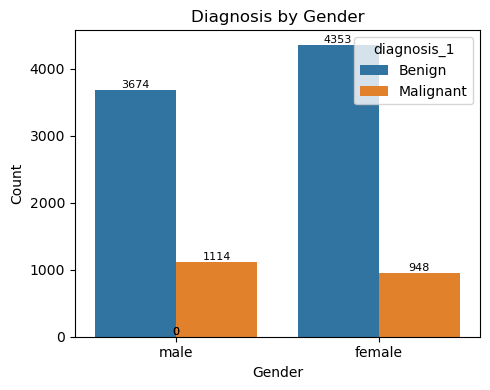

In [35]:
import seaborn as sns


plt.figure(figsize=(5, 4))
ax = sns.countplot(data=final_df, x='sex', hue='diagnosis_1')
plt.title('Diagnosis by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(str(count), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=8)
plt.show()


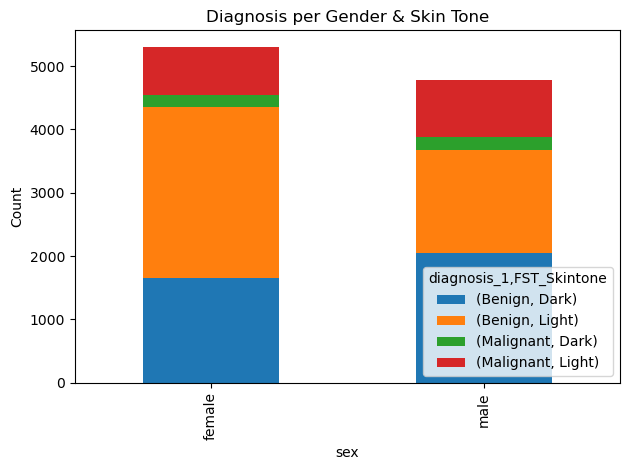

In [37]:
df_grouped = final_df.groupby(['sex', 'FST_Skintone', 'diagnosis_1']).size().unstack().unstack()

df_grouped.plot(kind='bar', stacked=True)
plt.title("Diagnosis per Gender & Skin Tone")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [39]:
import pandas as pd

# Step 1: Create category column (Tone + Diagnosis)
final_df['category'] = final_df['FST_Skintone'] + ' and ' + final_df['diagnosis_1']

# Step 2: Count how many malignant samples in each tone group
target_counts = (
    final_df[final_df['diagnosis_1'] == 'Malignant']
    .groupby('FST_Skintone')
    .size()
    .to_dict()
)

# Step 3: Sample benign class to match malignant count in each tone
sampled = []

for tone in ['Light', 'Dark']:
    # Keep all malignant
    malignant = final_df[(final_df['FST_Skintone'] == tone) & (final_df['diagnosis_1'] == 'Malignant')]
    sampled.append(malignant)

    # Undersample benign
    benign = final_df[(final_df['FST_Skintone'] == tone) & (final_df['diagnosis_1'] == 'Benign')]
    benign_sampled = benign.sample(n=target_counts[tone], random_state=42)
    sampled.append(benign_sampled)

# Step 4: Combine and shuffle
balanced_df = pd.concat(sampled).sample(frac=1, random_state=42).reset_index(drop=True)

# Optional: check result
print(balanced_df['category'].value_counts())

# Optional: save
##balanced_df.to_csv("stratified_balanced_dataset.csv", index=False)
###################################################################################################################################################

category
Light and Benign       1672
Light and Malignant    1672
Dark and Malignant      394
Dark and Benign         394
Name: count, dtype: int64


C:\Users\sohini\AppData\Local\Temp\ipykernel_7048\3886838597.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['category'] = final_df['FST_Skintone'] + ' and ' + final_df['diagnosis_1']


In [55]:
import pandas as pd


final_df['category'] = final_df['FST_Skintone'] + ' and ' + final_df['diagnosis_1']


malignant_df = final_df[final_df['diagnosis_1'] == 'Malignant']
malignant_counts_by_tone = malignant_df['FST_Skintone'].value_counts().to_dict()

####Sample benign to match malignant (within each tone)
benign_df = final_df[final_df['diagnosis_1'] == 'Benign']
benign_sampled = []

for tone, count in malignant_counts_by_tone.items():
    subset = benign_df[benign_df['FST_Skintone'] == tone]
    if len(subset) >= count:
        sampled = subset.sample(n=count, random_state=42)
    else:
        sampled = subset
       
    benign_sampled.append(sampled)

#  all malignant images
malignant_subset = malignant_df.copy()

### Combine equal benign + malignant for each tone
combined_df = pd.concat([malignant_subset] + benign_sampled, axis=0)



### Under-sample light tone images to match dark tone
light_df = combined_df[combined_df['FST_Skintone'] == 'Light']
dark_df = combined_df[combined_df['FST_Skintone'] == 'Dark']

min_count = min(len(light_df), len(dark_df))

light_df_balanced = light_df.sample(n=min_count, random_state=42)
dark_df_balanced = dark_df  # keep all dark

# Final dataset
fair_df = pd.concat([light_df_balanced, dark_df_balanced]).sample(frac=1, random_state=42).reset_index(drop=True)


print(fair_df['FST_Skintone'].value_counts())
print(fair_df['diagnosis_1'].value_counts())
print(fair_df['category'].value_counts())

display(fair_df)
fair_df.to_csv('balanced_dataset.csv', index=False)


FST_Skintone
Dark     788
Light    788
Name: count, dtype: int64
diagnosis_1
Malignant    826
Benign       750
Name: count, dtype: int64
category
Light and Malignant    432
Dark and Benign        394
Dark and Malignant     394
Light and Benign       356
Name: count, dtype: int64


C:\Users\sohini\AppData\Local\Temp\ipykernel_7048\3993808559.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['category'] = final_df['FST_Skintone'] + ' and ' + final_df['diagnosis_1']


isic_id fitzpatrick_skin_type diagnosis_1     sex FST_label  \
0     ISIC_2920975                    VI      Benign  female    FST VI   
1     ISIC_1780008                   III   Malignant  female   FST III   
2     ISIC_4135251                   III   Malignant  female   FST III   
3     ISIC_5203229                     I      Benign     NaN     FST I   
4     ISIC_6752955                     I   Malignant  female     FST I   
...            ...                   ...         ...     ...       ...   
1571  ISIC_9856048                   III   Malignant  female   FST III   
1572  ISIC_3372317                    VI      Benign  female    FST VI   
1573  ISIC_8348187                   III   Malignant    male   FST III   
1574  ISIC_5522478                   III      Benign    male   FST III   
1575  ISIC_4549590                   III   Malignant  female   FST III   

     FST_Skintone             category  
0            Dark      Dark and Benign  
1            Dark   Dark and Malignant  
2            Dark   Dark and Malignant  
3           Light     Light and Benign  
4           Light  Light and Malignant  
...           ...                  ...  
1571         Dark   Dark and Malignant  
1572         Dark      Dark and Benign  
1573         Dark   Dark and Malignant  
1574         Dark      Dark and Benign  
1575         Dark   Dark and Malignant  

[1576 rows x 7 columns]

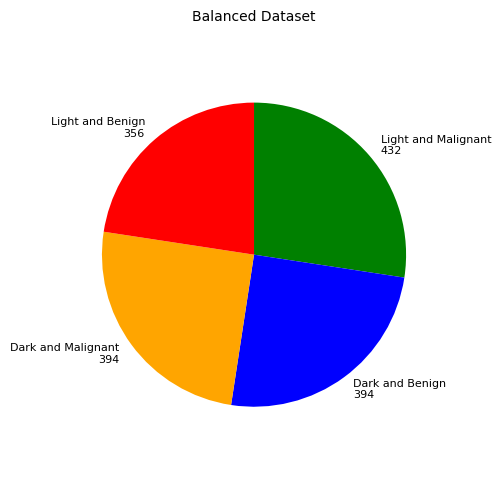

In [49]:
category_counts = fair_df["category"].value_counts()



# ###pie chart
plt.figure(figsize=(5, 5))

colors = ['green', 'blue', 'orange', 'red']  # Light-Benign, Light-Malignant, Dark-Benign, Dark-Malignant

# Add category name + count as label
labels = [f"{label}\n{count:,}" for label, count in zip(category_counts.index, category_counts.values)]

plt.pie(category_counts.values,
        labels=labels,
        colors=colors,
        startangle=90,
        counterclock=False,
        textprops={'fontsize': 8})

plt.title("Balanced Dataset", fontsize=10)
plt.axis('equal')
plt.tight_layout()
plt.show()


NameError: name 'categories' is not defined

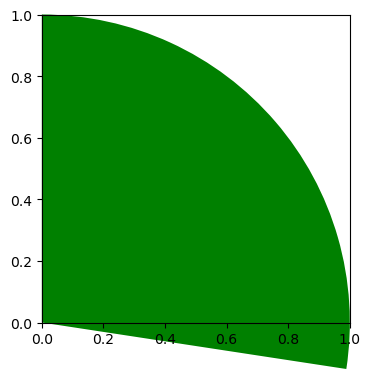

In [51]:

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        label_idx = list(values).index(val)
        label_name = categories[label_idx]
        return f"{label_name}\n{val:,}"
    return my_autopct


plt.figure(figsize=(4, 4))
plt.pie(category_counts.values,
        colors=colors,
        startangle=90,
        counterclock=False,
        autopct=make_autopct(category_counts.values),
        textprops={'fontsize': 8})

plt.title("Balanced Dataset", fontsize=12)
plt.axis('equal')
plt.tight_layout()
plt.show()


In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers


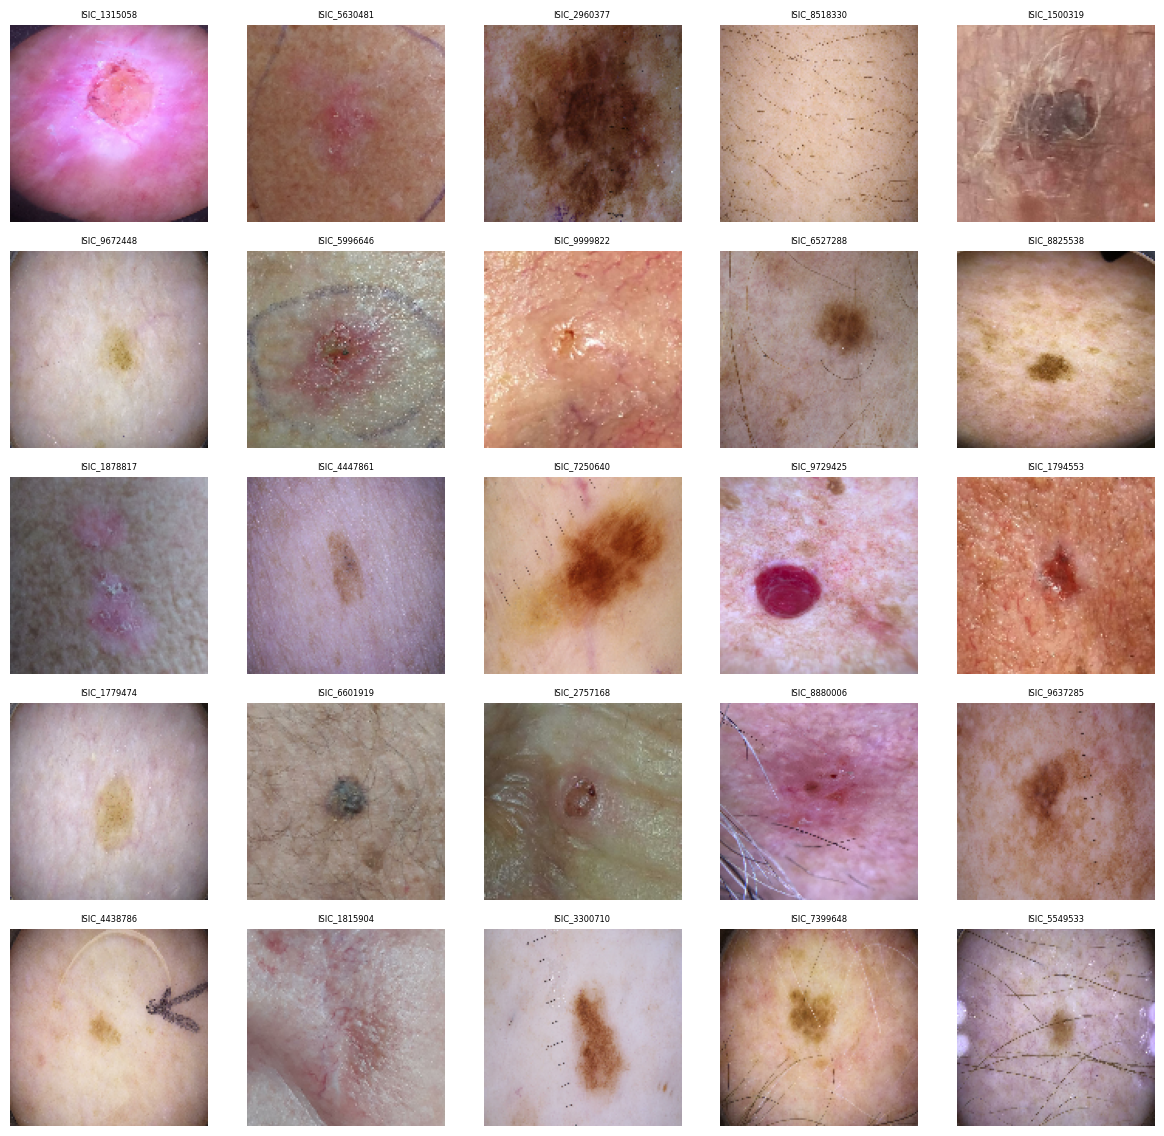

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import random
# Path to your folder
image_dir = "/home/ar24746/Downloads/balanceddataset"
image_paths = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir) if fname.endswith(".jpg")]
# Randomly pick 64 images
sample_paths = random.sample(image_paths, 25)
# Set up 8x8 grid
plt.figure(figsize=(12, 12))
for i, image_path in enumerate(sample_paths):
    # Load and preprocess image
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)  # or decode_png if using PNGs
    img = tf.image.resize(img, [128, 128])  # Resize for consistency
    img = tf.cast(img, tf.uint8)
    # Plot
    plt.subplot(5, 5, i + 1)
    plt.imshow(img.numpy().astype("uint8"))
    plt.axis("off")
    plt.title(os.path.basename(image_path).split(".")[0], fontsize=6)
plt.tight_layout()
##plt.suptitle("Random 8×8 Grid of Balanced ISIC Images", fontsize=16)
plt.subplots_adjust(top=0.93)
plt.show()

In [5]:
import pandas as pd
fair_df = pd.read_csv("C:\\Users\\sohini\\Downloads\\balanced_dataset.csv")

In [7]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load dataset
fair_df = pd.read_csv("C:\\Users\\sohini\\Downloads\\balanced_dataset.csv")

# Convert diagnosis to string binary labels
fair_df['label'] = fair_df['diagnosis_1'].map({'Benign': '0', 'Malignant': '1'})

# Add '.jpg' to image filenames
fair_df['filename'] = fair_df['isic_id'].astype(str) + ".jpg"

# Image data generator with validation split
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Training generator
train_gen = datagen.flow_from_dataframe(
    dataframe=fair_df,
    directory="C:\\isic_images\\isic_images\\balanceddataset",
    x_col='filename',
    y_col='label',
    subset='training',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    seed=42
)

# Validation generator
val_gen = datagen.flow_from_dataframe(
    dataframe=fair_df,
    directory="C:\\isic_images\\isic_images\\balanceddataset",
    x_col='filename',
    y_col='label',
    subset='validation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False,
    seed=42
)


Found 1261 validated image filenames belonging to 2 classes.
Found 315 validated image filenames belonging to 2 classes.


In [22]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
# Load base model
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze for transfer learning
# Add custom classification head
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # binary classification
])

In [23]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15  # you can increase later
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

/home/ar24746/.local/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.7793 - loss: 0.4956 - val_accuracy: 0.8635 - val_loss: 0.3238
Epoch 2/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.8946 - loss: 0.2768 - val_accuracy: 0.8857 - val_loss: 0.2752
Epoch 3/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.9186 - loss: 0.2166 - val_accuracy: 0.8857 - val_loss: 0.2748
Epoch 4/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.9117 - loss: 0.2144 - val_accuracy: 0.8889 - val_loss: 0.2632
Epoch 5/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.9200 - loss: 0.1977 - val_accuracy: 0.8667 - val_loss: 0.3146
Epoch 6/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.9251 - loss: 0.1729 - val_accuracy: 0.8698 - val_loss: 0.2807
Epoch 7/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.9235 - loss: 0.1796 - val_accuracy: 0.9048 - val_loss: 0.2408
Epoch 8/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.9563 - loss: 0.1331 - val_accuracy: 0.8921 - val_loss:

In [24]:
# Evaluate model performance
loss, acc = model.evaluate(val_gen)
print(f"Validation Accuracy: {acc:.4f}")
 

10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.8965 - loss: 0.3284
Validation Accuracy: 0.9048


In [25]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

y_true = val_gen.classes
y_pred = (model.predict(val_gen) > 0.3).astype("int32")

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

 

10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step
[[117  22]
 [ 12 164]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       139
           1       0.88      0.93      0.91       176

    accuracy                           0.89       315
   macro avg       0.89      0.89      0.89       315
weighted avg       0.89      0.89      0.89       315



In [ ]:
from sklearn.metrics import confusion_matrix

# `y_true` = true labels (0 = Benign, 1 = Malignant)
# `y_pred` = predicted labels from your model


 # Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=[0, 1])  # 0=Benign, 1=Malignant
tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix:")
print(cm)
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Positive (TP): {tp}")

Confusion Matrix:
[[117  22]
 [ 12 164]]
True Negative (TN): 117
False Positive (FP): 22
False Negative (FN): 12
True Positive (TP): 164


In [28]:
# Unfreeze the base MobileNetV2 model
base_model.trainable = True

# Optionally freeze only the early layers (fine-tune the last 30 layers)
for layer in base_model.layers[:-30]:
    layer.trainable = False


from tensorflow.keras.optimizers import Adam

# Use a low learning rate for fine-tuning
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
# Continue training (fine-tuning)
fine_tune_history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10  # or more, depending on early stopping
)
    

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.8053 - loss: 0.5371 - val_accuracy: 0.8857 - val_loss: 0.2937
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.8595 - loss: 0.3341 - val_accuracy: 0.8825 - val_loss: 0.3167
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.8869 - loss: 0.2671 - val_accuracy: 0.8857 - val_loss: 0.3267
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.9104 - loss: 0.2293 - val_accuracy: 0.8794 - val_loss: 0.3343
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.9210 - loss: 0.2142 - val_accuracy: 0.8730 - val_loss: 0.3515
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.9290 - loss: 0.1564 - val_accuracy: 0.8698 - val_loss: 0.3830
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.9299 - loss: 0.1560 - val_accuracy: 0.8730 - val_loss: 0.3719
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.9528 - loss: 0.1330 - val_accuracy: 0.8698 - val_loss:

In [30]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ModelCheckpoint("best_finetuned_model.h5", save_best_only=True)
]

fine_tune_history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    callbacks=callbacks
)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9742 - loss: 0.0835

40/40 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.9740 - loss: 0.0839 - val_accuracy: 0.8794 - val_loss: 0.3713
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.9865 - loss: 0.0649 - val_accuracy: 0.8730 - val_loss: 0.3927
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.9809 - loss: 0.0628 - val_accuracy: 0.8730 - val_loss: 0.3970
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.9658 - loss: 0.0835 - val_accuracy: 0.8762 - val_loss: 0.3858


In [37]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Get the true labels
y_true = val_gen.classes

# Get predicted probabilities → convert to binary class (0 or 1)
y_pred_probs = model.predict(val_gen)
y_pred = (y_pred_probs > 0.3).astype("int32").flatten()


10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step


In [38]:
cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix:")
print(cm)
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Positive (TP): {tp}")


Confusion Matrix:
[[132   7]
 [ 31 145]]
True Negative (TN): 132
False Positive (FP): 7
False Negative (FN): 31
True Positive (TP): 145


In [2]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])


2025-07-13 17:01:45.994226: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-13 17:01:45.995220: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-13 17:01:45.997305: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-13 17:01:46.002331: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752422506.010713  136729 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752422506.01

In [9]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ModelCheckpoint("best_custom_cnn.h5", save_best_only=True)
]

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    callbacks=callbacks
)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

/home/ar24746/.local/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4992 - loss: 0.9384

40/40 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.4997 - loss: 0.9342 - val_accuracy: 0.5937 - val_loss: 0.6604
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.6029 - loss: 0.6532 - val_accuracy: 0.5905 - val_loss: 0.7056
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6465 - loss: 0.6354

40/40 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.6475 - loss: 0.6343 - val_accuracy: 0.7651 - val_loss: 0.5161
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7742 - loss: 0.5361

40/40 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.7749 - loss: 0.5346 - val_accuracy: 0.7778 - val_loss: 0.4584
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8110 - loss: 0.4470

40/40 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.8111 - loss: 0.4469 - val_accuracy: 0.8190 - val_loss: 0.4107
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8467 - loss: 0.3804

40/40 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.8467 - loss: 0.3806 - val_accuracy: 0.8349 - val_loss: 0.4053
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8499 - loss: 0.3634

40/40 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.8498 - loss: 0.3637 - val_accuracy: 0.8540 - val_loss: 0.3947
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.8438 - loss: 0.3890 - val_accuracy: 0.7714 - val_loss: 0.5105
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.8548 - loss: 0.3703 - val_accuracy: 0.8222 - val_loss: 0.4305
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8462 - loss: 0.3829

40/40 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.8466 - loss: 0.3824 - val_accuracy: 0.8540 - val_loss: 0.3833


In [11]:
# Evaluate
loss, accuracy = model.evaluate(val_gen)
print(f"Validation Accuracy: {accuracy:.4f}")

import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Predict
y_true = val_gen.classes
y_pred = (model.predict(val_gen) > 0.5).astype("int32").flatten()

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report
print(classification_report(y_true, y_pred))


10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.8188 - loss: 0.4152
Validation Accuracy: 0.8540
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step
Confusion Matrix:
 [[127  12]
 [ 34 142]]
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       139
           1       0.92      0.81      0.86       176

    accuracy                           0.85       315
   macro avg       0.86      0.86      0.85       315
weighted avg       0.86      0.85      0.85       315



In [12]:
cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix:")
print(cm)
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Positive (TP): {tp}")

Confusion Matrix:
[[127  12]
 [ 34 142]]
True Negative (TN): 127
False Positive (FP): 12
False Negative (FN): 34
True Positive (TP): 142


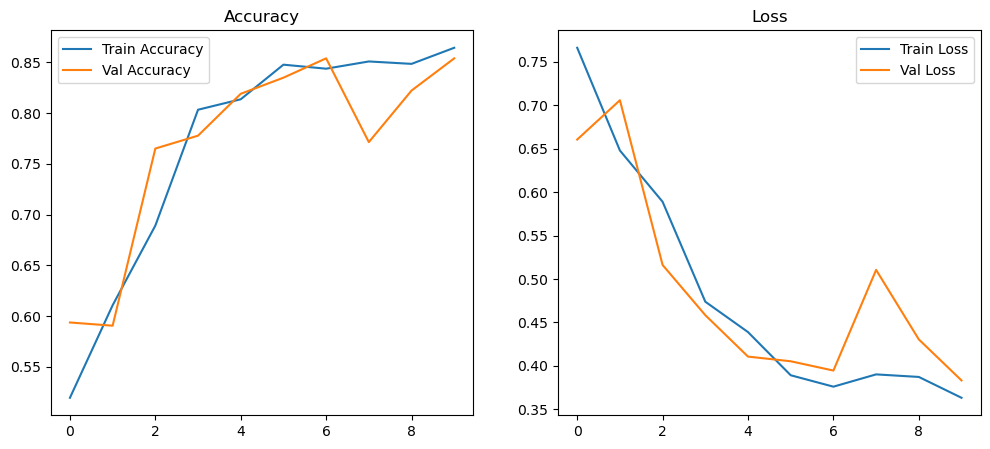

In [13]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title("Accuracy")
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title("Loss")
    plt.legend()

    plt.show()

plot_history(history)


In [1]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# 1. Input layer
input_layer = Input(shape=(224, 224, 3), name='Input_Image')

# 2. (Optional) Initial AlexNet-like Conv layers if you wish to merge them.
# For simplicity and reproducibility, we stick to VGG19 backbone as main feature extractor.
# Advanced users can extract AlexNet layers and concatenate their outputs, but this is not standard in Keras.

# 3. VGG19 base (transfer learning)
# Pretrained on ImageNet, excluding top FC layers
vgg_base = VGG19(weights='imagenet', include_top=False, input_tensor=input_layer)

# 4. Freeze first three layers (to mimic paper's approach)
for layer in vgg_base.layers[:3]:
    layer.trainable = False

# 5. Custom classifier on top of VGG19 base
x = vgg_base.output
x = Flatten(name='Flatten')(x)
x = Dense(4096, activation='relu', name='FC1')(x)
x = Dropout(0.5, name='Dropout1')(x)
x = Dense(4096, activation='relu', name='FC2')(x)
x = Dropout(0.5, name='Dropout2')(x)
output_layer = Dense(2, activation='softmax', name='Output')(x)

# 6. Build the final model
model = Model(inputs=input_layer, outputs=output_layer)

# 7. Compile model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',   # Use 'sparse_categorical_crossentropy' if your targets are integer encoded
              metrics=['accuracy'])

model.summary()

 

2025-07-20 14:55:51.082730: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-20 14:55:51.151299: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-20 14:55:51.675315: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-20 14:55:52.013537: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753019752.296804 1924516 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753019752.36

E0000 00:00:1753019765.073666 1924516 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1753019765.079007 1924516 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Image (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FC1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout1 (Dropout)              │ (None, 4096)           │             

 Total params: 139,578,434 (532.45 MB)

 Trainable params: 139,539,714 (532.30 MB)

 Non-trainable params: 38,720 (151.25 KB)

In [4]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load dataset
fair_df = pd.read_csv("/home/ar24746/Downloads/balanced_dataset.csv")

# Convert diagnosis to string binary labels
fair_df['label'] = fair_df['diagnosis_1'].map({'Benign': '0', 'Malignant': '1'})

# Add '.jpg' to image filenames
fair_df['filename'] = fair_df['isic_id'].astype(str) + ".jpg"

# Image data generator with validation split
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Training generator
train_gen = datagen.flow_from_dataframe(
    dataframe=fair_df,
    directory="/home/ar24746/Downloads/balanceddataset",
    x_col='filename',
    y_col='label',
    subset='training',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    seed=42
)

# Validation generator
val_gen = datagen.flow_from_dataframe(
    dataframe=fair_df,
    directory="/home/ar24746/Downloads/balanceddataset",
    x_col='filename',
    y_col='label',
    subset='validation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False,
    seed=42
)

Found 1261 validated image filenames belonging to 2 classes.
Found 315 validated image filenames belonging to 2 classes.


In [6]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

history = model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen,
    callbacks=[early_stop, checkpoint]
)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5052 - loss: 52.1770

40/40 ━━━━━━━━━━━━━━━━━━━━ 258s 6s/step - accuracy: 0.5056 - loss: 51.3573 - val_accuracy: 0.4413 - val_loss: 0.6935
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5134 - loss: 0.6931

40/40 ━━━━━━━━━━━━━━━━━━━━ 283s 7s/step - accuracy: 0.5132 - loss: 0.6931 - val_accuracy: 0.5587 - val_loss: 0.6903
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5229 - loss: 0.6924

40/40 ━━━━━━━━━━━━━━━━━━━━ 276s 7s/step - accuracy: 0.5227 - loss: 0.6924 - val_accuracy: 0.5587 - val_loss: 0.6893
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 262s 7s/step - accuracy: 0.5030 - loss: 0.6936 - val_accuracy: 0.5587 - val_loss: 0.6896
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.4998 - loss: 0.6939

40/40 ━━━━━━━━━━━━━━━━━━━━ 278s 7s/step - accuracy: 0.5002 - loss: 0.6939 - val_accuracy: 0.5587 - val_loss: 0.6891
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 261s 7s/step - accuracy: 0.5306 - loss: 0.6915 - val_accuracy: 0.5587 - val_loss: 0.6912
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 256s 6s/step - accuracy: 0.5119 - loss: 0.6935 - val_accuracy: 0.5587 - val_loss: 0.6919
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 254s 6s/step - accuracy: 0.4876 - loss: 0.6937 - val_accuracy: 0.5587 - val_loss: 0.6898
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 254s 6s/step - accuracy: 0.5062 - loss: 0.6932 - val_accuracy: 0.5587 - val_loss: 0.6898
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 259s 6s/step - accuracy: 0.4936 - loss: 0.6946 - val_accuracy: 0.5587 - val_loss: 0.6897


In [10]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix


In [11]:
# Simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')


/home/ar24746/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Train the model
history = model.fit(
    train_gen,
    epochs=4,
    validation_data=val_gen,
    callbacks=[early_stop, checkpoint]
)

# Evaluation
val_gen.reset()
preds = model.predict(val_gen)
y_pred = (preds > 0.5).astype(int).reshape(-1)  # sigmoid outputs
y_true = np.array(val_gen.classes).astype(int)


Epoch 1/4
40/40 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.7178 - loss: 0.5616 - val_accuracy: 0.7873 - val_loss: 0.5435
Epoch 2/4
40/40 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.8197 - loss: 0.4683 - val_accuracy: 0.7778 - val_loss: 0.5398
Epoch 3/4
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7795 - loss: 0.4782

40/40 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.7802 - loss: 0.4778 - val_accuracy: 0.8254 - val_loss: 0.4424
Epoch 4/4
40/40 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.8478 - loss: 0.3937 - val_accuracy: 0.7873 - val_loss: 0.4736
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step


In [14]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Extract TP, TN, FP, FN
if cm.shape == (2, 2):
    TN, FP, FN, TP = cm.ravel()
    print(f"\nTrue Positives (TP):  {TP}")
    print(f"True Negatives (TN):  {TN}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
else:
    print(f"\nConfusion matrix is not binary (shape: {cm.shape}), can't extract TP, TN, FP, FN.")

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=val_gen.class_indices.keys()))

Confusion Matrix:
 [[121  18]
 [ 37 139]]

True Positives (TP):  139
True Negatives (TN):  121
False Positives (FP): 18
False Negatives (FN): 37

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.81       139
           1       0.89      0.79      0.83       176

    accuracy                           0.83       315
   macro avg       0.83      0.83      0.82       315
weighted avg       0.83      0.83      0.83       315



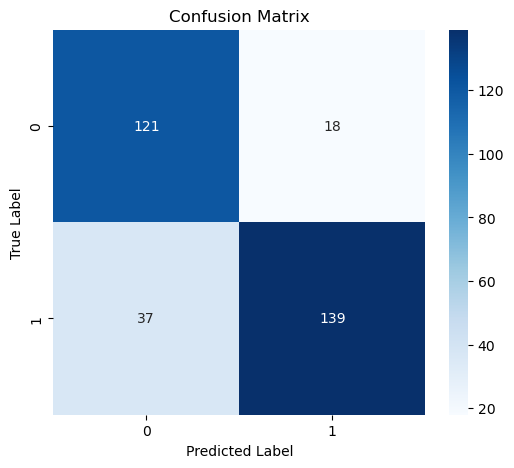

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=val_gen.class_indices.keys(),
            yticklabels=val_gen.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


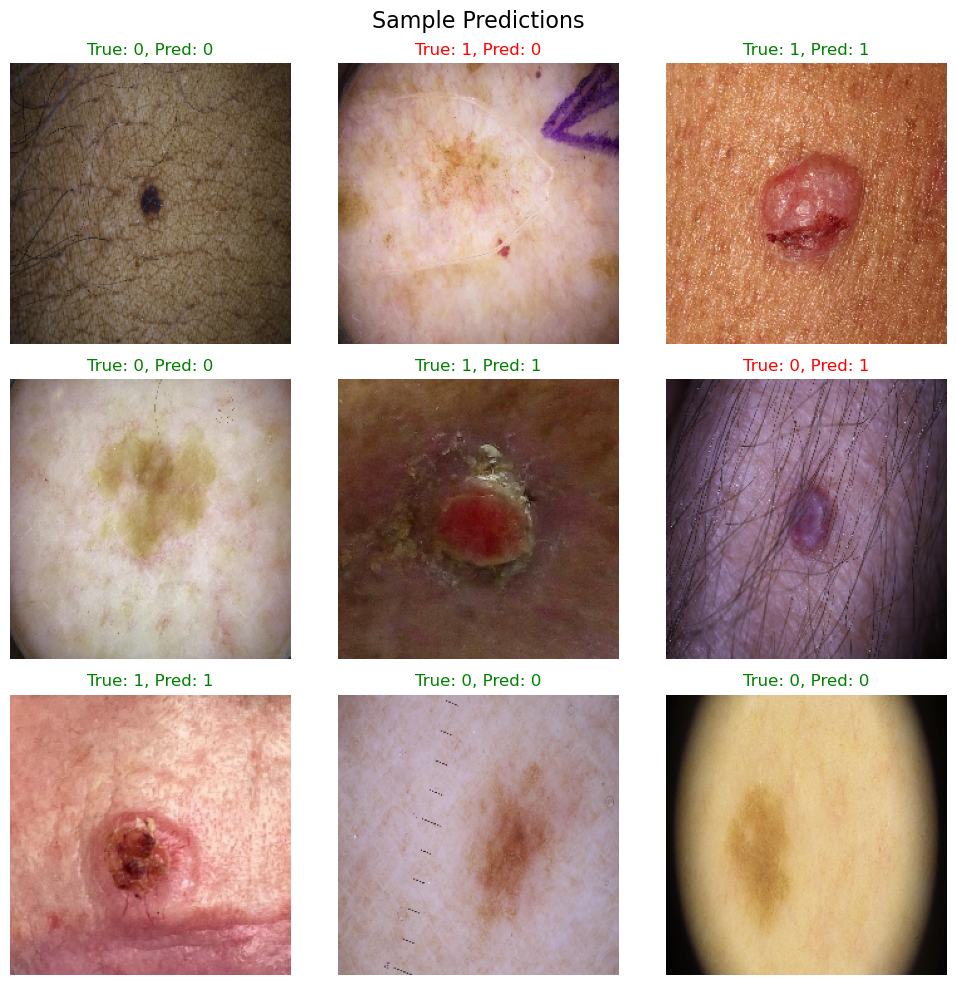

In [21]:
# Reverse class indices (e.g. {0: 'Benign', 1: 'Malignant'})
class_labels = {v: k for k, v in val_gen.class_indices.items()}

# Fetch a batch of images and predictions
val_gen.reset()
x_batch, y_batch = next(val_gen)

preds_batch = model.predict(x_batch)
pred_labels = (preds_batch > 0.5).astype(int).reshape(-1)

# Plot first 9 predictions
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i])
    true_lbl = class_labels[int(y_batch[i])]
    pred_lbl = class_labels[int(pred_labels[i])]
    plt.title(f"True: {true_lbl}, Pred: {pred_lbl}",
              color="green" if true_lbl == pred_lbl else "red")
    plt.axis('off')
plt.suptitle("Sample Predictions", fontsize=16)
plt.tight_layout()
plt.show()


In [19]:
from sklearn.metrics import confusion_matrix

# After predicting y_pred and having true labels y_true:
cm = confusion_matrix(y_true, y_pred)
# Confusion matrix order: [[TN, FP], [FN, TP]]

TN, FP, FN, TP = cm.ravel()

sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

print(f"Sensitivity: {sensitivity:.3f}")
print(f"Specificity: {specificity:.3f}")

 

Sensitivity: 0.790
Specificity: 0.871


In [40]:
display(fair_df)

isic_id fitzpatrick_skin_type diagnosis_1     sex FST_label  \
0     ISIC_2920975                    VI      Benign  female    FST VI   
1     ISIC_1780008                   III   Malignant  female   FST III   
2     ISIC_4135251                   III   Malignant  female   FST III   
3     ISIC_5203229                     I      Benign     NaN     FST I   
4     ISIC_6752955                     I   Malignant  female     FST I   
...            ...                   ...         ...     ...       ...   
1571  ISIC_9856048                   III   Malignant  female   FST III   
1572  ISIC_3372317                    VI      Benign  female    FST VI   
1573  ISIC_8348187                   III   Malignant    male   FST III   
1574  ISIC_5522478                   III      Benign    male   FST III   
1575  ISIC_4549590                   III   Malignant  female   FST III   

     FST_Skintone             category  
0            Dark      Dark and Benign  
1            Dark   Dark and Malignant  
2            Dark   Dark and Malignant  
3           Light     Light and Benign  
4           Light  Light and Malignant  
...           ...                  ...  
1571         Dark   Dark and Malignant  
1572         Dark      Dark and Benign  
1573         Dark   Dark and Malignant  
1574         Dark      Dark and Benign  
1575         Dark   Dark and Malignant  

[1576 rows x 7 columns]

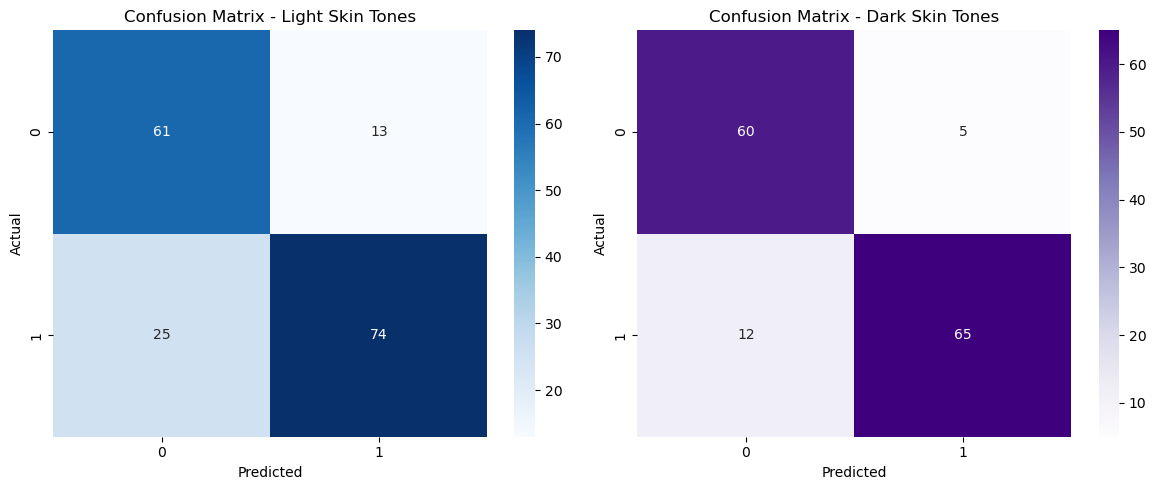


Light Skin Tones:
  True Positives (TP):  74
  True Negatives (TN):  61
  False Positives (FP): 13
  False Negatives (FN): 25

Dark Skin Tones:
  True Positives (TP):  65
  True Negatives (TN):  60
  False Positives (FP): 5
  False Negatives (FN): 12

Classification Report - Light Skin Tones:
              precision    recall  f1-score   support

           0       0.71      0.82      0.76        74
           1       0.85      0.75      0.80        99

    accuracy                           0.78       173
   macro avg       0.78      0.79      0.78       173
weighted avg       0.79      0.78      0.78       173


Classification Report - Dark Skin Tones:
              precision    recall  f1-score   support

           0       0.83      0.92      0.88        65
           1       0.93      0.84      0.88        77

    accuracy                           0.88       142
   macro avg       0.88      0.88      0.88       142
weighted avg       0.88      0.88      0.88       142



In [41]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Map filenames to predictions
results_df = pd.DataFrame({
    'filename': [os.path.basename(f) for f in val_gen.filenames],
    'y_true': y_true,
    'y_pred': y_pred
})

# Create a filename column in fair_df that matches val_gen.filenames
fair_df['filename'] = fair_df['isic_id'].astype(str) + '.jpg'

# 3. Merge predictions with skintone labels
merged_df = pd.merge(results_df, fair_df[["filename", "FST_Skintone"]], on="filename", how="left")

# 4. Separate into light and dark skintone groups
light_df = merged_df[merged_df["FST_Skintone"] == "Light"]
dark_df = merged_df[merged_df["FST_Skintone"] == "Dark"]

# 5. Compute confusion matrices
cm_light = confusion_matrix(light_df["y_true"], light_df["y_pred"])
cm_dark = confusion_matrix(dark_df["y_true"], dark_df["y_pred"])

# 6. Plot them
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_light, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix - Light Skin Tones")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_dark, annot=True, fmt='d', cmap='Purples', ax=axes[1])
axes[1].set_title("Confusion Matrix - Dark Skin Tones")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

# 7. Print TP, TN, FP, FN
def print_stats(cm, label):
    if cm.shape == (2, 2):
        TN, FP, FN, TP = cm.ravel()
        print(f"\n{label} Skin Tones:")
        print(f"  True Positives (TP):  {TP}")
        print(f"  True Negatives (TN):  {TN}")
        print(f"  False Positives (FP): {FP}")
        print(f"  False Negatives (FN): {FN}")
    else:
        print(f"{label} confusion matrix is not binary.")

print_stats(cm_light, "Light")
print_stats(cm_dark, "Dark")

# 8. Classification report
print("\nClassification Report - Light Skin Tones:")
print(classification_report(light_df["y_true"], light_df["y_pred"]))

print("\nClassification Report - Dark Skin Tones:")
print(classification_report(dark_df["y_true"], dark_df["y_pred"]))


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model

# Load dataset
fair_df = pd.read_csv("C:\\Users\\sohini\\Downloads\\balanced_dataset.csv")

# Convert diagnosis to string binary labels
fair_df['label'] = fair_df['diagnosis_1'].map({'Benign': '0', 'Malignant': '1'})

# Add '.jpg' to image filenames
fair_df['filename'] = fair_df['isic_id'].astype(str) + ".jpg"

# Image data generator with validation split
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Training generator
train_gen = datagen.flow_from_dataframe(
    dataframe=fair_df,
    directory="C:\\isic_images\\isic_images\\balanceddataset",
    x_col='filename',
    y_col='label',
    subset='training',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

# Validation generator
val_gen = datagen.flow_from_dataframe(
    dataframe=fair_df,
    directory="C:\\isic_images\\isic_images\\balanceddataset",
    x_col='filename',
    y_col='label',
    subset='validation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    seed=42
)


Found 1261 validated image filenames belonging to 2 classes.
Found 315 validated image filenames belonging to 2 classes.


In [3]:
# ========================
# 3. Build Model (as per paper)
# ========================
input_layer = Input(shape=(224, 224, 3), name='Input_Image')
x = Conv2D(32, (7, 7), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(2, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

# Optional: Save Model Diagram
plot_model(model, to_file='cnn_architecture.png', show_shapes=True, show_layer_names=True)

# ========================
# 4. Training
# ========================
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint("best_cnn_from_paper.h5", save_best_only=True)
]

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=3,
    callbacks=callbacks
)

# ========================
# 5. Evaluation
# ========================
val_gen.reset()
preds = model.predict(val_gen)
y_pred = np.argmax(preds, axis=1)
y_true = val_gen.classes

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(y_true, y_pred))
 

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Image (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,609,666 (196.88 MB)

 Trainable params: 51,609,666 (196.88 MB)

 Non-trainable params: 0 (0.00 B)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


C:\Users\sohini\anaconda3\envs\text_analytics\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5056 - loss: 0.6977

40/40 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.5064 - loss: 0.6975 - val_accuracy: 0.5524 - val_loss: 0.6635
Epoch 2/3
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5631 - loss: 0.6800

40/40 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.5635 - loss: 0.6798 - val_accuracy: 0.7079 - val_loss: 0.6409
Epoch 3/3
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6076 - loss: 0.6578

40/40 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.6077 - loss: 0.6578 - val_accuracy: 0.7333 - val_loss: 0.6204
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
Confusion Matrix:
[[ 91  48]
 [ 36 140]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.65      0.68       139
           1       0.74      0.80      0.77       176

    accuracy                           0.73       315
   macro avg       0.73      0.73      0.73       315
weighted avg       0.73      0.73      0.73       315



In [15]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


'"C:\Users\sohini\anaconda3\condabin\mamba_hook.bat"' is not recognized as an internal or external command,
operable program or batch file.
DEPRECATION: Loading egg at c:\users\sohini\anaconda3\envs\text_analytics\lib\site-packages\huggingface_hub-0.29.2-py3.8.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [5]:
plot_model(model, to_file='cnn_architecture.png', show_shapes=True, show_layer_names=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


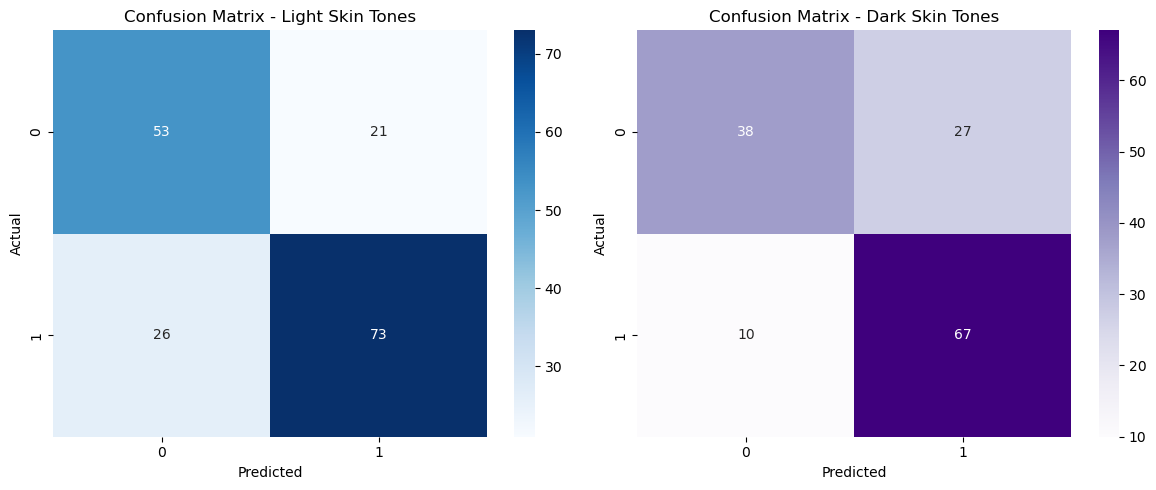


Light Skin Tones:
  True Positives (TP):  73
  True Negatives (TN):  53
  False Positives (FP): 21
  False Negatives (FN): 26

Dark Skin Tones:
  True Positives (TP):  67
  True Negatives (TN):  38
  False Positives (FP): 27
  False Negatives (FN): 10

Classification Report - Light Skin Tones:
              precision    recall  f1-score   support

           0       0.67      0.72      0.69        74
           1       0.78      0.74      0.76        99

    accuracy                           0.73       173
   macro avg       0.72      0.73      0.72       173
weighted avg       0.73      0.73      0.73       173


Classification Report - Dark Skin Tones:
              precision    recall  f1-score   support

           0       0.79      0.58      0.67        65
           1       0.71      0.87      0.78        77

    accuracy                           0.74       142
   macro avg       0.75      0.73      0.73       142
weighted avg       0.75      0.74      0.73       142



In [7]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Map filenames to predictions
results_df = pd.DataFrame({
    'filename': [os.path.basename(f) for f in val_gen.filenames],
    'y_true': y_true,
    'y_pred': y_pred
})

# Create a filename column in fair_df that matches val_gen.filenames
fair_df['filename'] = fair_df['isic_id'].astype(str) + '.jpg'

# 3. Merge predictions with skintone labels
merged_df = pd.merge(results_df, fair_df[["filename", "FST_Skintone"]], on="filename", how="left")

# 4. Separate into light and dark skintone groups
light_df = merged_df[merged_df["FST_Skintone"] == "Light"]
dark_df = merged_df[merged_df["FST_Skintone"] == "Dark"]

# 5. Compute confusion matrices
cm_light = confusion_matrix(light_df["y_true"], light_df["y_pred"])
cm_dark = confusion_matrix(dark_df["y_true"], dark_df["y_pred"])

# 6. Plot them
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_light, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix - Light Skin Tones")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_dark, annot=True, fmt='d', cmap='Purples', ax=axes[1])
axes[1].set_title("Confusion Matrix - Dark Skin Tones")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

# 7. Print TP, TN, FP, FN
def print_stats(cm, label):
    if cm.shape == (2, 2):
        TN, FP, FN, TP = cm.ravel()
        print(f"\n{label} Skin Tones:")
        print(f"  True Positives (TP):  {TP}")
        print(f"  True Negatives (TN):  {TN}")
        print(f"  False Positives (FP): {FP}")
        print(f"  False Negatives (FN): {FN}")
    else:
        print(f"{label} confusion matrix is not binary.")

print_stats(cm_light, "Light")
print_stats(cm_dark, "Dark")

# 8. Classification report
print("\nClassification Report - Light Skin Tones:")
print(classification_report(light_df["y_true"], light_df["y_pred"]))

print("\nClassification Report - Dark Skin Tones:")
print(classification_report(dark_df["y_true"], dark_df["y_pred"]))


In [9]:
def tone_disparate_impact_from_df(merged_df, positive_label=1):
    dark = merged_df[merged_df["FST_Skintone"] == "Dark"]
    light = merged_df[merged_df["FST_Skintone"] == "Light"]
    
    dark_positive = (dark['y_pred'] == positive_label).sum()
    light_positive = (light['y_pred'] == positive_label).sum()
    n_dark = len(dark)
    n_light = len(light)
    
    rate_dark = dark_positive / n_dark 
    rate_light = light_positive / n_light 
    
    di = rate_dark / rate_light 
    
    print(f"Dark: {dark_positive}/{n_dark} = {rate_dark:.3f}")
    print(f"Light: {light_positive}/{n_light} = {rate_light:.3f}")
    print(f"Tone Disparate Impact = {di:.3f}")
    return di

# Call it:
tone_disparate_impact_from_df(merged_df)


Dark: 94/142 = 0.662
Light: 94/173 = 0.543
Tone Disparate Impact = 1.218


np.float64(1.2183098591549297)

In [13]:
import visualkeras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([Dense(10, input_shape=(10,)), Dense(1)])
visualkeras.layered_view(model, to_file='model.png').show()

C:\Users\sohini\anaconda3\envs\text_analytics\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\sohini\anaconda3\envs\text_analytics\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


In [29]:
pip install visualkeras

Note: you may need to restart the kernel to use updated packages.


'"C:\Users\sohini\anaconda3\condabin\mamba_hook.bat"' is not recognized as an internal or external command,
operable program or batch file.
DEPRECATION: Loading egg at c:\users\sohini\anaconda3\envs\text_analytics\lib\site-packages\huggingface_hub-0.29.2-py3.8.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
